In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Data Preprocessing

In [7]:
train_df = pd.read_csv(r'C:\Users\susha\Downloads\archive (8)\FraudDetection\fraudTrain.csv', index_col="Unnamed: 0")
test_df = pd.read_csv(r'C:\Users\susha\Downloads\archive (8)\FraudDetection\fraudTest.csv',  index_col="Unnamed: 0")

In [8]:
test_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [14]:
train_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [25]:
fraud_count = train_df['is_fraud'].value_counts()
fraud_count

0    1042569
1       6006
Name: is_fraud, dtype: int64

In [19]:
fraud_count = test_df['is_fraud'].value_counts()
fraud_count

0    553574
1      2145
Name: is_fraud, dtype: int64

In [30]:
print(train_df.isna().sum().sum())


0


In [32]:
print(train_df.duplicated().sum())


0


In [70]:
sample_df = train_df.sample(20)

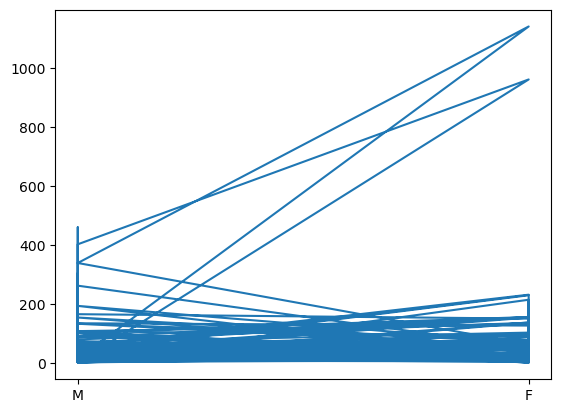

In [72]:
plt.plot(sample_df['gender'], sample_df['amt'])

In [77]:
data = [['tom', 10, 20], ['nick', 15, 30], ['juli', 14, 28]]
df = pd.DataFrame(data, columns=['Name', 'Age', 'Age+10'])

In [78]:
df

,Name,Age,Age+10
0,tom,10,20
1,nick,15,30
2,juli,14,28


In [89]:
np.arange(df.shape[0])-0.8

array([-0.8,  0.2,  1.2])

([<matplotlib.axis.XTick at 0x26788070b20>,
 [Text(0.0, 0, 'tom'), Text(1.0, 0, 'nick'), Text(2.0, 0, 'juli')])

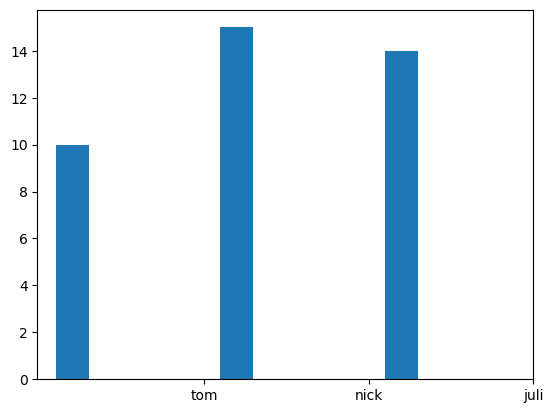

In [92]:
plt.bar(np.arange(df.shape[0])-0.8, df['Age'], width=.2)
plt.xticks(np.arange(df.shape[0]-.8),df['Name'])